# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [257]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [386]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

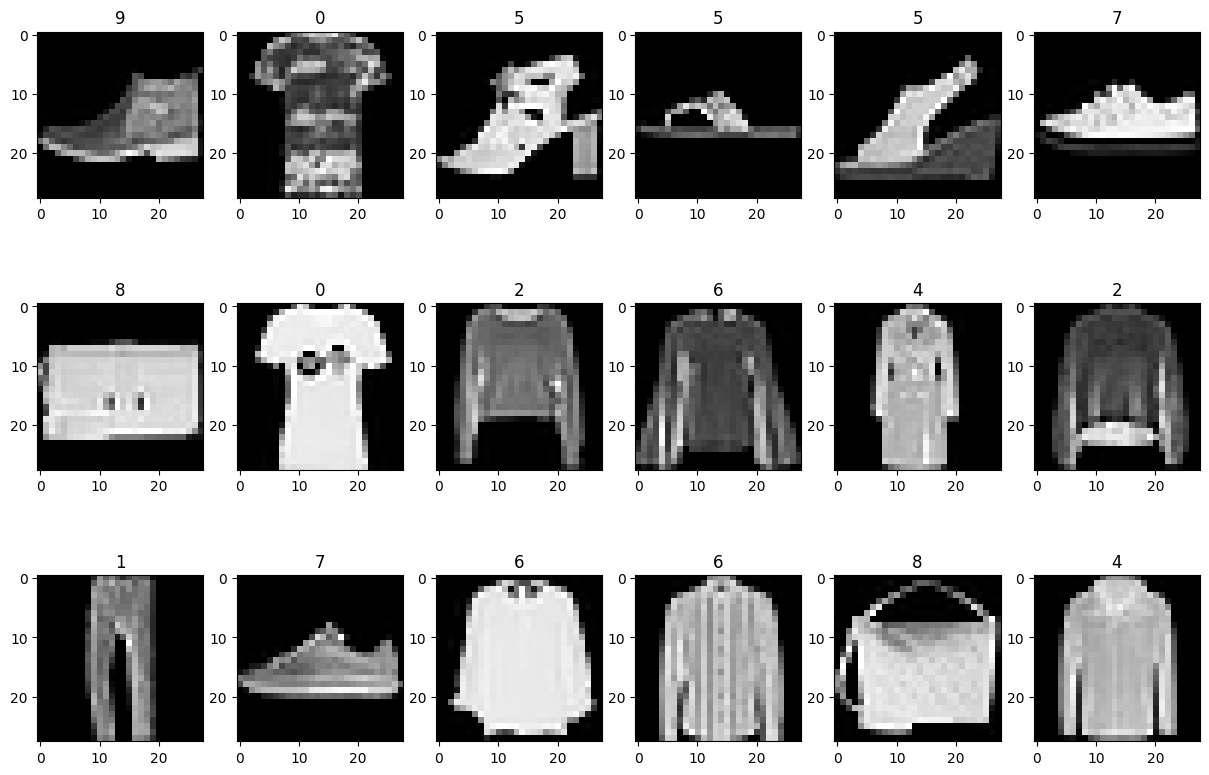

In [284]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [387]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [360]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_88 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_174 (Conv2D)             │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_88 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [251]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
392/938 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.2952 - loss: 1.9168

KeyboardInterrupt: 

Train Acc      0.2910051941871643
Validation Acc 0.5547000169754028


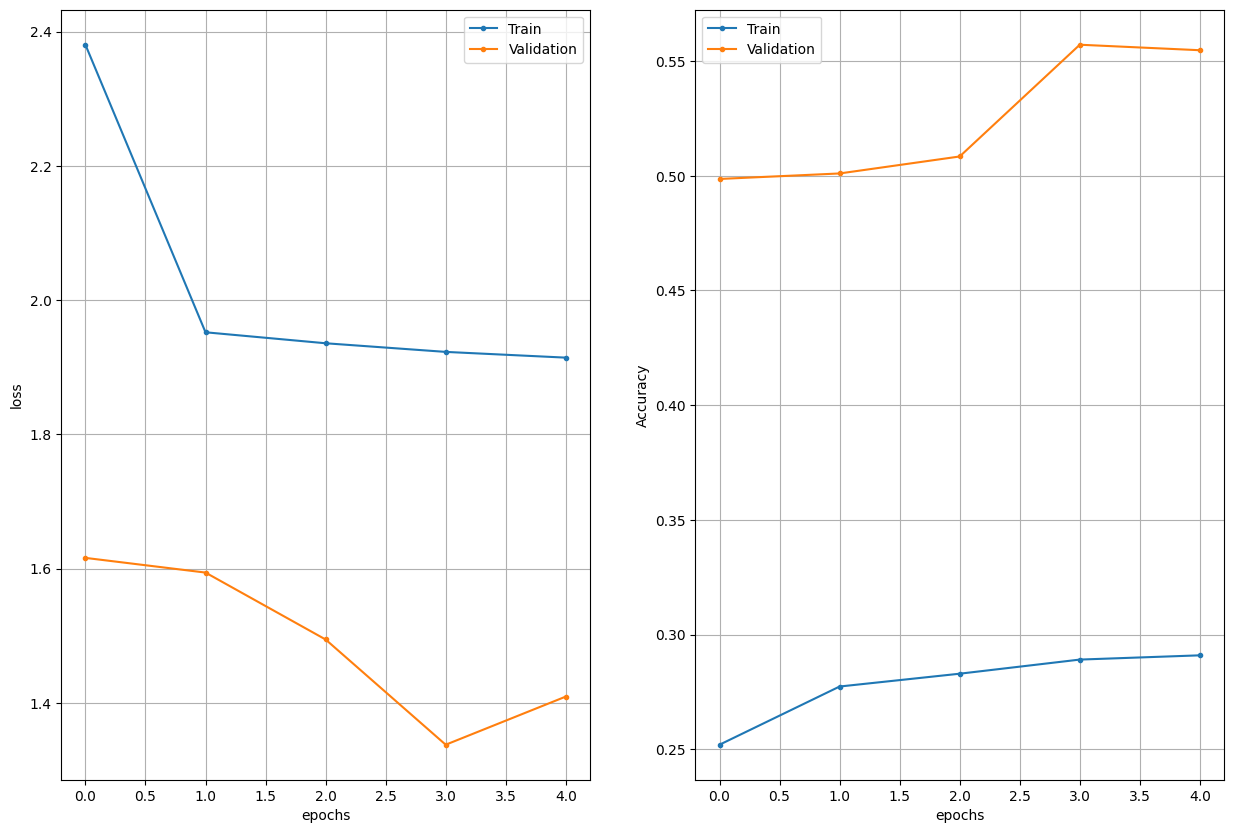

In [261]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [388]:
from keras import regularizers as reg

# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Flatten()(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_94 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_214 (Conv2D)             │ (None, 28, 28, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_155               │ (None, 14, 14, 256)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_94 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 10)             │       501,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,330 (1.92 MB)

 Trainable params: 504,330 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [389]:
from sklearn.utils import shuffle
import albumentations as A

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                rand = np.random.rand()

                transform = A.Compose([
                    # A.RandomRotate90(),
                    A.HorizontalFlip(p=0.5),
                    # A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),

                    # A.Transpose(),
                    # A.Blur(blur_limit=3),
                    # A.GridDistortion(),
                ])


                if rand > 0.5:
                    x_[idx_aug] = transform(image=x_[idx_aug])['image']
                    
            yield x_, y_

In [390]:
# Train the network
epochs = 50
batch_size = 128

steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, min_delta=0.0001)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50


468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7720 - loss: 0.6502 - val_accuracy: 0.8728 - val_loss: 0.3745
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8820 - loss: 0.3372 - val_accuracy: 0.8807 - val_loss: 0.3265
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8989 - loss: 0.2901 - val_accuracy: 0.8838 - val_loss: 0.3190
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9068 - loss: 0.2634 - val_accuracy: 0.8960 - val_loss: 0.2934
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9095 - loss: 0.2564 - val_accuracy: 0.8984 - val_loss: 0.2853
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9137 - loss: 0.2384 - val_accuracy: 0.9049 - val_loss: 0.2748
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9192 - loss: 0.2220 - val_accuracy: 0.9031 - val_loss: 0.2777
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9247 - loss: 0.2137 - val_accurac

Train Acc      0.9665297865867615
Validation Acc 0.9174000024795532


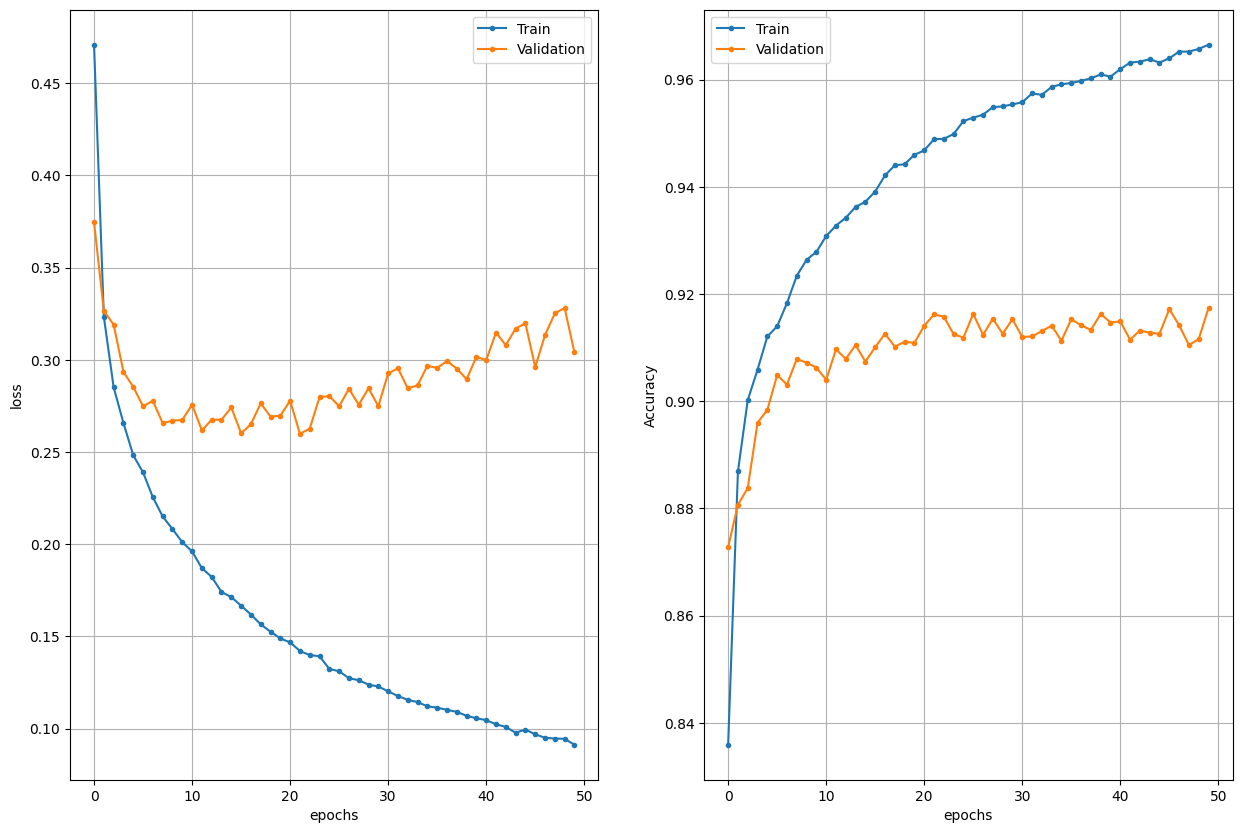

In [391]:
# Show the results
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

### Answers

* What have you done in order to improve the performance?

I've included multiple convolutional layers with batch normalisation + max pooling. Also using Albumentations package prepared data augmentation pipeline.

* Have you tried configurations that did not work out?

Yes, I tried adding weight regularisation configuration, it worsen validation accuracy down to 0.85. Also tried using Blur / Defocus functions for data augmentation, they really worsen training & validation accuracy (almost to 0.8%). Need to make data augmentation pretty simple since very complex one can greatly slow the overall training and validation process. Also tried early stopping - it did not work because the growth of accuracy (or loss function) on some iterations grow not significantly.